### Purpose:
The purpose of this assignment is to assess how you think through problems, explore data, generate insights, and translate those insights into actionable interventions. There isn’t a ‘right’ or ‘wrong’ answer; rather, we are interested in understanding your thought process and approach.
#### Option 1: Take-Home Assignment + Collaborative Review Time Commitment:
You have 10 days to complete the assignment, but please spend no more than 4 hours working on it.
1. Phase 1: Take-Home Data Exploration & Intervention Proposal Objective: Assess how you explore data, generate insights, and propose a meaningful
intervention.
Process:
You will be given a dataset that contains a variety of information. Based on this dataset, we want you to:
- Explore the data and identify key trends, insights, or anomalies.
- Propose an intervention based on your findings.
- Explain how you would measure the success of your intervention.
- Prepare a brief report or slide deck summarizing your findings and intervention proposal.
- Any supporting code or notebooks.

2. Phase 2: Collaborative Review & Iteration (45-60 min Interview) Objective: Simulate the design review process and provide an opportunity to refine your
approach collaboratively.
Process:
- We will discuss your take-home submission in detail.
- You will receive feedback on your analysis, intervention, and methodology.
- You will have the opportunity to iterate on your solution and ask questions directly to the
engineering team.
 
What We’re Looking For:
- Your ability to adjust and refine your solution based on feedback.
- Thoughtfulness in addressing potential limitations or trade-offs.
- Effective communication of your insights and decisions.

In [35]:
#pip install pyarrow
#pip install seaborn

In [1]:
import pandas as pd 
import pyarrow.parquet as pq
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [2]:
df = pq.ParquetFile("locations.parquet").metadata
print(df)


  created_by: parquet-cpp-arrow version 19.0.0
  num_columns: 17
  num_rows: 76081415
  num_row_groups: 76
  format_version: 2.6
  serialized_size: 128683


In [3]:
import pyarrow.parquet as pq

# Open Parquet file
parquet_file = pq.ParquetFile("locations.parquet")

# Read the first row group into a table
table = parquet_file.read_row_group(0)  # Read the first row group
df = table.to_pandas()  # Convert to Pandas DataFrame

# Display first few rows
df.head()


,trackingId,level,timestamp,floorId,roomId,x,y,origin,lost,irAssisted,moving,roomName,floorName,buildingId,campusId,hospitalName,ingested_at
0,00:fa:b6:14:bb:b4,floor,2025-02-04 11:05:37.927000+00:00,60395,66127,151.291367,83.789062,null,False,False,False,TICU 2,1st,57534,57494,Green Acres Hospital,2025-02-04 11:18:29+00:00
1,00:fa:b6:14:6e:0e,floor,2025-02-04 11:07:38.041000+00:00,57574,58946,85.923943,46.777565,null,False,False,True,BAY 08 (NICU),2nd,57534,57494,Green Acres Hospital,2025-02-04 11:18:28+00:00
2,00:fa:b6:14:6f:34,floor,2025-02-04 11:15:32.981000+00:00,61374,61797,12.927481,83.786171,null,False,True,False,462 (4 NORTH),4th,57534,57494,Green Acres Hospital,2025-02-04 11:18:28+00:00
3,00:fa:b6:14:94:b4,floor,2025-02-04 11:09:27.497000+00:00,61534,61700,32.269310,96.342186,null,False,True,False,568 (5 NORTH),5th,57534,57494,Green Acres Hospital,2025-02-04 11:18:28+00:00
4,00:fa:b6:14:bb:9c,floor,2025-02-04 11:01:45.719000+00:00,61534,61795,17.074898,96.155296,null,False,True,False,565 (5 NORTH),5th,57534,57494,Green Acres Hospital,2025-02-04 11:18:29+00:00


### Inspectin the data 

In [58]:
print(df.info())  # Shows column data types & missing values
print(df.describe())  # Summarizes numerical columns
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype                  
---  ------        --------------    -----                  
 0   trackingId    1048576 non-null  object                 
 1   level         1048576 non-null  object                 
 2   timestamp     1048576 non-null  datetime64[ns]         
 3   floorId       1048576 non-null  int64                  
 4   roomId        1048576 non-null  int64                  
 5   x             1048576 non-null  float64                
 6   y             1048576 non-null  float64                
 7   origin        1048576 non-null  object                 
 8   lost          1048576 non-null  bool                   
 9   irAssisted    1048576 non-null  bool                   
 10  moving        1048576 non-null  bool                   
 11  roomName      1048576 non-null  object                 
 12  floorName     1048576 non-nu

In [59]:
# Check for missing values
print(df.isnull().sum())

trackingId      0
level           0
timestamp       0
floorId         0
roomId          0
x               0
y               0
origin          0
lost            0
irAssisted      0
moving          0
roomName        0
floorName       0
buildingId      0
campusId        0
hospitalName    0
ingested_at     0
date            0
hour            0
day_of_week     0
month           0
year            0
dtype: int64


In [ ]:
#Find Total Unique Devices Being Tracked:
df["trackingId"].nunique()

In [ ]:
#Count the Number of Entries Per Floor:
df["floorName"].value_counts()

#### Possible Use Cases for the **moving** Column:
#### Activity Analysis:
- Track movement patterns within the hospital.
- Can indicate busy areas during different times of the day.
#### Shift Change Patterns:
- A surge in moving events could align with staff shift changes.
#### Equipment or Patient Flow:
- Identifies frequently relocated equipment.
- Tracks patient mobility trends in different hospital areas.


In [4]:
#Find Moving vs. Non-Moving Devices:
df["moving"].value_counts()

moving
False    834752
True     213824
Name: count, dtype: int64

In [5]:
#Find the Most Common Rooms with Activity:
df["roomName"].value_counts().head(10)

roomName
CORRIDOR BY ED 18-19                        15794
ED EXAM ROOM 18                             11985
CORRIDOR BY CYSTO ROOM-BRONCHOSCOPY ROOM    10741
CORRIDOR BY POU-CLEAN SUPPLY (4N)            9585
CORRIDOR BY OB ELEVATORS                     9324
OFFICE NEXT TO CLEAN SUPLLY (4 NORTH)        9167
KITCHEN (CAFETERIA)                          8901
CORRIDOR BY 587-591 (5E)                     8710
BAY 6 (CATHLAB)                              8463
CORRIDOR BY CASE MANAGEMENT                  8027
Name: count, dtype: int64

In [ ]:
#Filter Data for a Specific Floor (e.g., 1st Floor):
df[df["floorName"] == "4th"]

### Seasonality and Time-Based Patterns:

#### 1. Extract Time Components

In [6]:
#Convert timestamp to datetime for analysis
df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [7]:
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year


### 2. Analyze Movement Over Time (Hourly/Daily Trends)
Visualize the number of movements over time (hourly, daily, monthly)

### Expected Insights:
- Hourly Patterns: Find certain hours of the day show more movement, such as during shift changes or certain hospital events.
- Day of the Week: Certain days might show more activity (e.g., weekends vs weekdays).

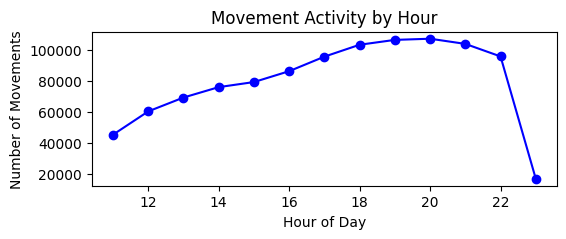

In [36]:

# Hourly Movement Activity
import matplotlib.pyplot as plt
hourly_activity = df.groupby('hour').size()

plt.figure(figsize=(6, 2))
plt.plot(hourly_activity.index, hourly_activity.values, marker='o', linestyle='-', color='b')
plt.title('Movement Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Movements')
plt.show()


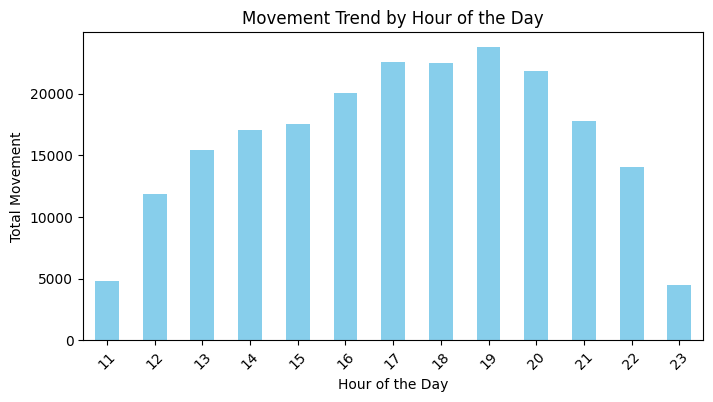

In [9]:
# Group by hour and count movements (assuming 'moving' column is True/False)
hourly_movement = df.groupby('hour')['moving'].sum()

# Plot the hourly movement data
plt.figure(figsize=(8, 4))
hourly_movement.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Total Movement')
plt.title('Movement Trend by Hour of the Day')

# Display the plot
plt.xticks(rotation=45)
plt.show()


In [10]:
hourly_movement_sorted = hourly_movement.sort_values(ascending=False)
hourly_movement_sorted

hour
19    23798
17    22555
18    22511
20    21852
16    20021
21    17779
15    17583
14    17065
13    15399
22    14087
12    11883
11     4791
23     4500
Name: moving, dtype: int64

In [13]:
# Define the list of target hours
target_hours = [17,19,20,18,16]  

# Filter data for rows where 'hour' is in the target list
filtered_data = df[df['hour'].isin(target_hours)]

# filtered_data.head(100)
filtered_data.sample(10)

,trackingId,level,timestamp,floorId,roomId,x,y,origin,lost,irAssisted,moving,roomName,floorName,buildingId,campusId,hospitalName,ingested_at,date,hour,day_of_week,month,year
576523,00:fa:b6:24:34:14,floor,2025-02-04 18:10:04,57574,59219,118.005753,71.867706,null,False,False,False,SOILED UTILITY BY LD-04 (LD),2nd,57534,57494,Green Acres Hospital,2025-02-04 18:28:38+00:00,2025-02-04,18,Tuesday,2,2025
491683,00:fa:b6:24:20:28,floor,2025-02-04 17:18:58,60395,63714,46.494549,162.153702,null,False,False,False,OFFICE NEXT TO BAY 6 (CATHLAB),1st,57534,57494,Green Acres Hospital,2025-02-04 17:27:02+00:00,2025-02-04,17,Tuesday,2,2025
782380,00:fa:b6:24:32:9a,floor,2025-02-04 20:00:13,60395,63774,46.461185,159.434174,null,False,False,False,SOILED OPPOSITE 7 (CATHLAB),1st,57534,57494,Green Acres Hospital,2025-02-04 20:31:50+00:00,2025-02-04,20,Tuesday,2,2025
593539,00:fa:b6:24:32:dc,floor,2025-02-04 18:14:03,60395,66854,103.638680,100.621765,null,False,False,False,CORRIDOR BY OB ELEVATORS,1st,57534,57494,Green Acres Hospital,2025-02-04 18:28:38+00:00,2025-02-04,18,Tuesday,2,2025
525888,00:fa:b6:24:2b:92,floor,2025-02-04 18:25:51,1103776,1105825,9.361095,9.832016,null,False,False,True,Education,Education Building,1105156,57494,Green Acres Hospital,2025-02-04 18:28:33+00:00,2025-02-04,18,Tuesday,2,2025
630420,00:fa:b6:24:22:56,floor,2025-02-04 19:28:32,119594,120056,51.406422,51.188564,null,False,False,True,MED PREP ALCOVE BY 334 (3C),3rd,57534,57494,Green Acres Hospital,2025-02-04 19:30:03+00:00,2025-02-04,19,Tuesday,2,2025
584389,00:fa:b6:24:1e:18,floor,2025-02-04 18:13:01,60395,974696,142.374985,66.707680,null,False,False,False,EXAM ROOM 11 (1E DC LOUNGE),1st,57534,57494,Green Acres Hospital,2025-02-04 18:28:33+00:00,2025-02-04,18,Tuesday,2,2025
345947,00:fa:b6:23:d8:a0,floor,2025-02-04 16:11:10,60395,65964,96.018097,119.726913,null,False,False,False,BAY 5 (SURGICAL SVCS),1st,57534,57494,Green Acres Hospital,2025-02-04 16:25:26+00:00,2025-02-04,16,Tuesday,2,2025
748043,00:fa:b6:24:2b:8f,floor,2025-02-04 20:25:35,60395,67042,116.901375,53.662422,null,False,False,False,CORRIDOR BY ED 18-19,1st,57534,57494,Green Acres Hospital,2025-02-04 20:31:45+00:00,2025-02-04,20,Tuesday,2,2025
527856,00:fa:b6:24:1e:78,floor,2025-02-04 18:04:44,61374,62877,86.362022,50.040401,null,False,True,True,CORRIDOR BY 424-430 (4C),4th,57534,57494,Green Acres Hospital,2025-02-04 18:28:31+00:00,2025-02-04,18,Tuesday,2,2025


In [14]:
filtered_data.shape

(500170, 22)

In [15]:
# Daily Movement Activity
daily_activity = df.groupby('day_of_week').size()
print(daily_activity.head())

# Monthly Movement Activity
monthly_activity = df.groupby('month').size()
print(monthly_activity.head())

day_of_week
Tuesday    1048576
dtype: int64
month
2    1048576
dtype: int64


In [ ]:

# # Create the scatter plot
# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(df['x'], df['y'], c=df['roomName'].astype('category').cat.codes, cmap='viridis', alpha=0.7)

# # Add colorbar
# plt.colorbar(label='Room Name')

# # Labels and title
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Scatter Plot of Room Locations')

# plt.show()


### 3. Lost/Assisted Events Over Time

#### Potential Insights from These Columns:
- High lost counts in specific areas → Potential signal issues or coverage gaps.
- High irAssisted counts in certain rooms → likely means that Infrared (IR) assistance was frequently triggered in a particular location or for specific tracked entities (patients, staff, or equipment)
- Comparing lost and irAssisted → See if IR assistance reduces tracking losses.

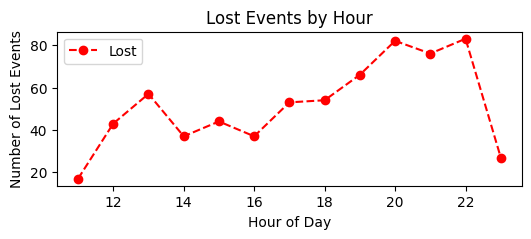

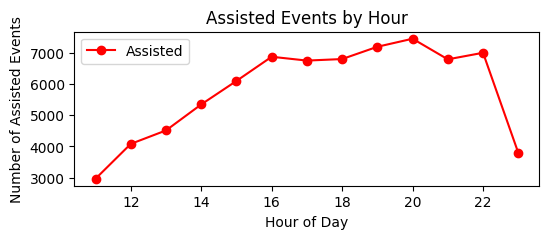

In [32]:
# Lost Events by Hour
lost_hourly_activity = df[df['lost'] == True].groupby('hour').size()

plt.figure(figsize=(6, 2))
#sns.lineplot(x=lost_hourly_activity.index, y=lost_hourly_activity.values, label="Lost")
plt.plot(lost_hourly_activity.index, lost_hourly_activity.values, label="Lost", color='red', linestyle='--', marker='o')
plt.title('Lost Events by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Lost Events')
plt.legend()
plt.show()

# Assisted Events by Hour
assisted_hourly_activity = df[df['irAssisted'] == True].groupby('hour').size()

plt.figure(figsize=(6, 2))
# sns.lineplot(x=assisted_hourly_activity.index, y=assisted_hourly_activity.values, label="Assisted", color='r')
plt.plot(assisted_hourly_activity.index, assisted_hourly_activity.values, label="Assisted", color='r', linestyle='-', marker='o')

plt.title('Assisted Events by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Assisted Events')
plt.legend()
plt.show()


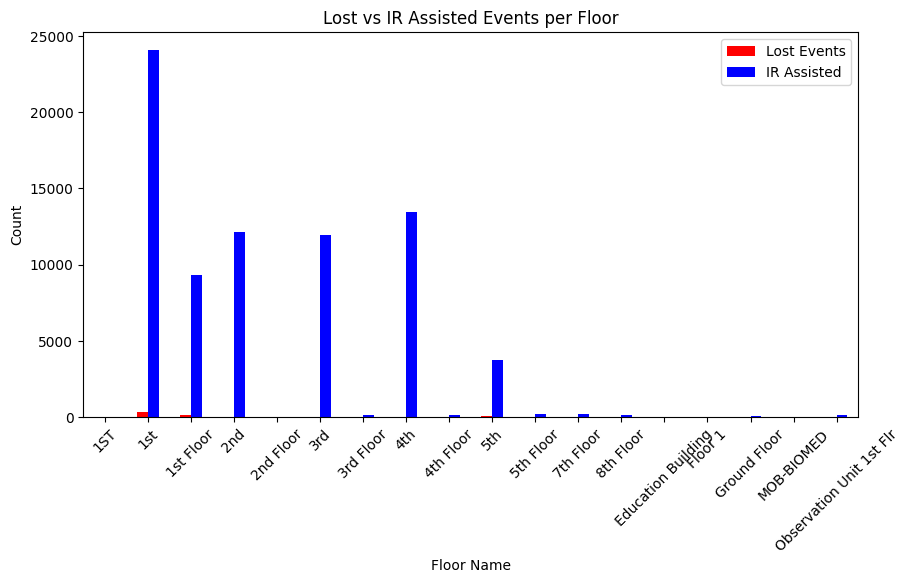

In [17]:
import matplotlib.pyplot as plt

# Group by floor and sum lost & assisted events
floor_summary = df.groupby('floorName')[['lost', 'irAssisted']].sum()

# Bar plot
floor_summary.plot(kind='bar', figsize=(10, 5), color=['red', 'blue'])
plt.xlabel('Floor Name')
plt.ylabel('Count')
plt.title('Lost vs IR Assisted Events per Floor')
plt.legend(['Lost Events', 'IR Assisted'])
plt.xticks(rotation=45)
plt.show()


In [19]:
floor_summary = df.groupby('floorName')[['lost', 'irAssisted']].sum()
print(floor_summary)

                          lost  irAssisted
floorName                                 
1ST                          0           0
1st                        341       24056
1st Floor                  155        9312
2nd                         22       12140
2nd Floor                    3          13
3rd                         16       11929
3rd Floor                    0         153
4th                         28       13484
4th Floor                    0         118
5th                         37        3718
5th Floor                    0         177
7th Floor                    1         204
8th Floor                    0         131
Education Building          24           0
Floor 1                     29           0
Ground Floor                 6          38
MOB-BIOMED                  14          11
Observation Unit 1st Flr     0         106


### 4. Correlation Between Variables

In [ ]:
room_summary = df.groupby('roomName')[['lost', 'irAssisted']].sum()
room_summary.sort_values(ascending=False) 

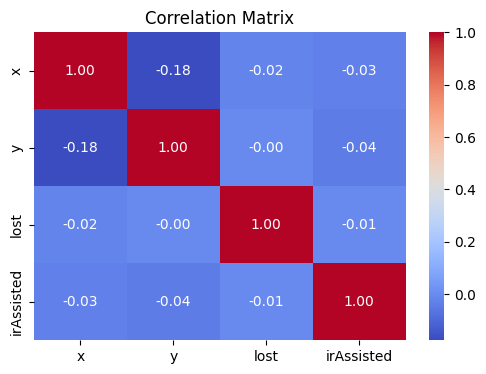

In [34]:
# Look for correlations between numerical columns (x, y, lost, irAssisted, etc.
# Correlation heatmap of numerical variables

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

correlation_matrix = df[['x', 'y', 'lost', 'irAssisted']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### In practical terms:

This means that there is almost no linear association between whether a situation is "irAssisted" and whether something is "lost." Knowing the value of one variable gives you virtually no information about the value of the other. They are essentially independent of each other in a linear sense.

#### Important Note:

Correlation measures only linear relationships. There might be a non-linear relationship between these variables that is not captured by this correlation matrix.
A correlation of -0.01 is so small that it's often considered to be practically zero, meaning no meaningful relationship.

### 5. Anomaly Detection (Outliers in Movement)
Room/Location Anomalies: Identify if certain rooms or floors have unusually high counts of lost or irAssisted events. This could point to locations needing more resources (e.g., better tracking, more staff).


In [52]:
# Room/Location Anomalies (based on 'lost' and 'irAssisted' columns)

# Group by roomName and check the sum of 'lost' and 'irAssisted'
room_anomalies = df.groupby('roomName')[['lost', 'irAssisted']].sum()
room_anomalies

# Sort the rooms by lost and irAssisted values to identify anomalies
room_anomalies_sorted = room_anomalies.sort_values(by=['lost', 'irAssisted'], ascending=False)
print(room_anomalies_sorted)

                                                    lost  irAssisted
roomName                                                            
CORRIDOR BETWEEN RM 21-26                             65           0
M2 storage                                            41           0
ALCOVE                                                39          10
MAIN CAFETERIA SITTING AREA (CAFETERIA)               37         180
Ambulatory Services                                   29           0
Outside ED Ambulance Entrance                         28           0
EQUIPMENT STORAGE/REC STORAGE (SC 1-1)                26           0
Education                                             24           0
CORRIDOR ICU 11-12                                    22           7
ELEVATOR LOBBY NEAR ICU 14                            22           4
EXIT - LOADING DOCK                                   21           0
562 (5 NORTH)                                         15           9
Biomed                            

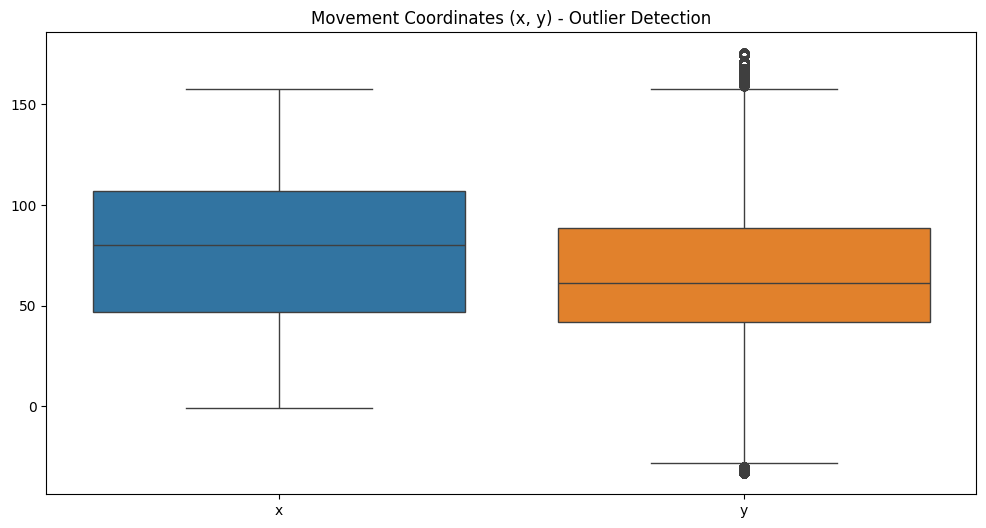

In [51]:
# Boxplot for 'x' and 'y' coordinates to detect anomalies
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['x', 'y']])
plt.title('Movement Coordinates (x, y) - Outlier Detection')
plt.show()


In [39]:
# Find rows where 'irAssisted' is greater than 0
ir_assisted_lost = room_anomalies[room_anomalies['irAssisted'] > 0]

# Sort these rooms by the 'lost' values in descending order
ir_assisted_lost_sorted = ir_assisted_lost.sort_values(by='lost', ascending=False)

# Print the sorted room anomalies for review
print(ir_assisted_lost_sorted)

                                                    lost  irAssisted
roomName                                                            
ALCOVE                                                39          10
MAIN CAFETERIA SITTING AREA (CAFETERIA)               37         180
CORRIDOR ICU 11-12                                    22           7
ELEVATOR LOBBY NEAR ICU 14                            22           4
562 (5 NORTH)                                         15           9
Biomed                                                14          11
EXAM ROOM 3 (1E DC LOUNGE)                             9          20
346 (3 SOUTH)                                          6           1
CORRIDOR BY RADIOLOGY 4-5                              6         182
CORRIDOR BY ULTRASOUND ROOM 2 (RADIOLOGY HALLWAY)      6         204
LD-06 (LD)                                             6           1
LD-07 (LD)                                             5           1
446 (4 SOUTH)                     

In [ ]:
ir_assisted_lost_sorted = ir_assisted_lost.sort_values(by=['irAssisted'], ascending=False)
ir_assisted_lost_sorted

In [41]:
floor_anomalies = df.groupby('floorName')[['lost', 'irAssisted']].sum()
floor_anomalies

,lost,irAssisted
floorName,,
1ST,0,0
1st,341,24056
1st Floor,155,9312
2nd,22,12140
2nd Floor,3,13
3rd,16,11929
3rd Floor,0,153
4th,28,13484
4th Floor,0,118


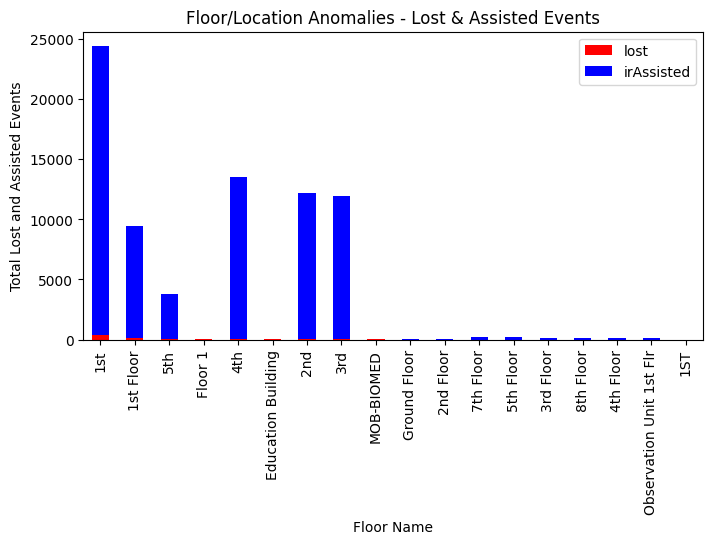

                          lost  irAssisted
floorName                                 
1st                        341       24056
1st Floor                  155        9312
5th                         37        3718
Floor 1                     29           0
4th                         28       13484
Education Building          24           0
2nd                         22       12140
3rd                         16       11929
MOB-BIOMED                  14          11
Ground Floor                 6          38
2nd Floor                    3          13
7th Floor                    1         204
5th Floor                    0         177
3rd Floor                    0         153
8th Floor                    0         131
4th Floor                    0         118
Observation Unit 1st Flr     0         106
1ST                          0           0


In [42]:
# Plot the floor anomalies based on lost or irAssisted events
floor_anomalies_sorted = floor_anomalies.sort_values(by=['lost', 'irAssisted'], ascending=False)
floor_anomalies_sorted.plot(kind='bar', stacked=True, figsize=(8, 4), color=['red', 'blue'])

# Labels and title for Room/Location Anomalies
plt.xlabel('Floor Name')
plt.ylabel('Total Lost and Assisted Events')
plt.title('Floor/Location Anomalies - Lost & Assisted Events')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)
plt.show()

# Print the room anomalies data for review
print(floor_anomalies_sorted)

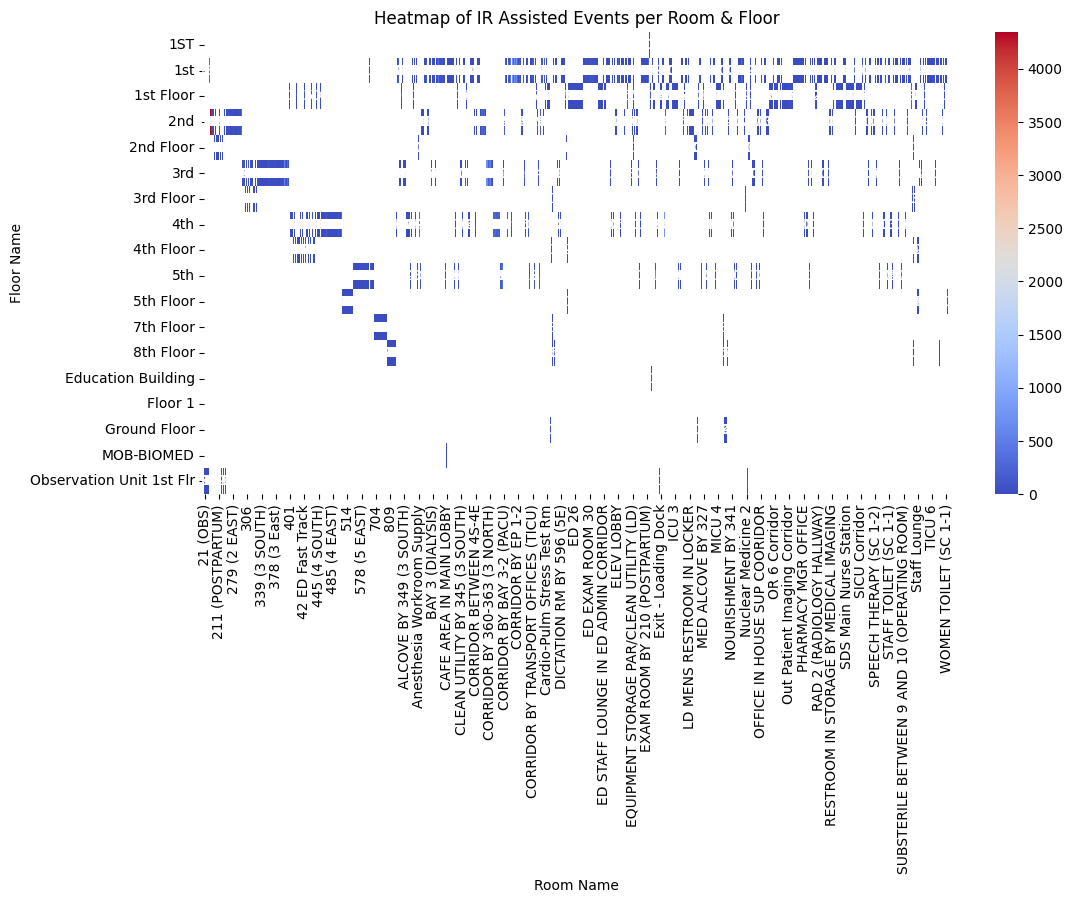

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pivot table for heatmap
heatmap_data = df.pivot_table(values='irAssisted', index='floorName', columns='roomName', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("Heatmap of IR Assisted Events per Room & Floor")
plt.xlabel("Room Name")
plt.ylabel("Floor Name")
plt.xticks(rotation=90)
plt.show()


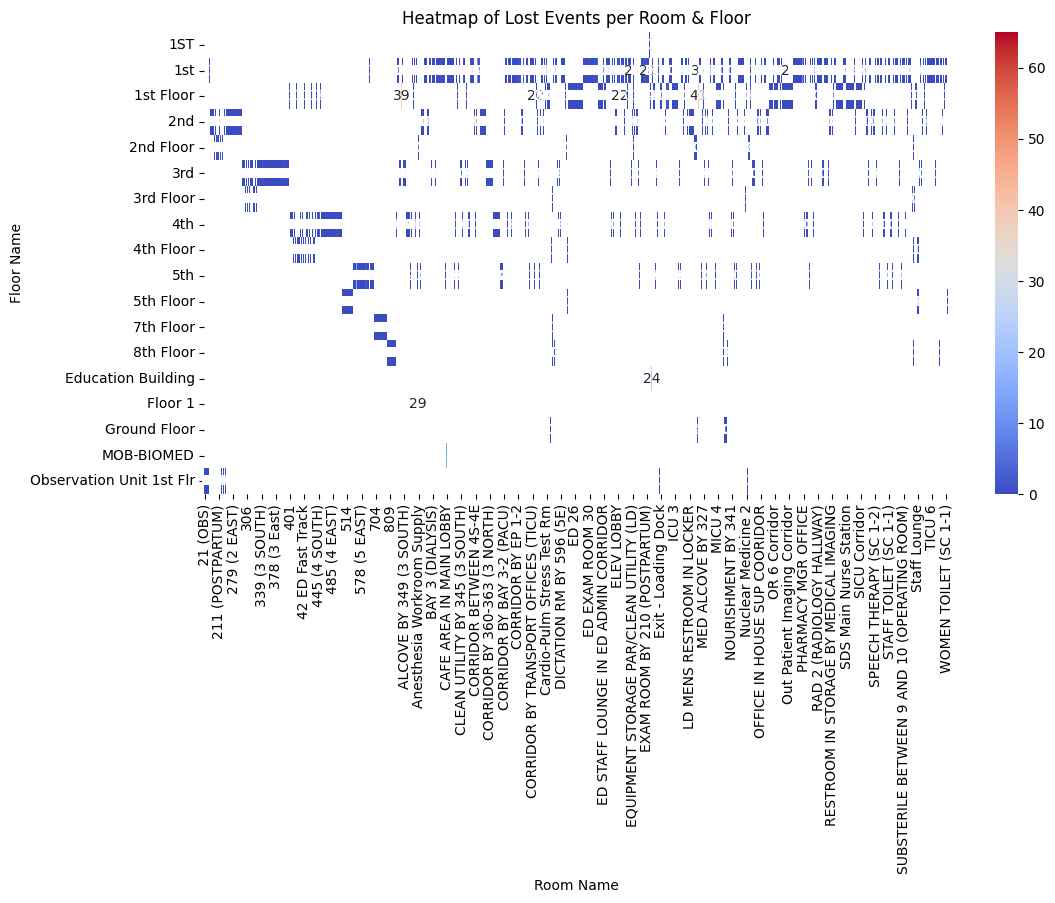

In [44]:
heatmap_data = df.pivot_table(values='lost', index='floorName', columns='roomName', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("Heatmap of Lost Events per Room & Floor")
plt.xlabel("Room Name")
plt.ylabel("Floor Name")
plt.xticks(rotation=90)
plt.show()

In [57]:
floor_trafic = df.groupby('floorName')['moving'].sum()
floor_trafic.sort_values(ascending=False)

floorName
1st                         130179
3rd                          23995
4th                          22068
2nd                          21765
5th                          11374
1st Floor                     3416
7th Floor                      189
5th Floor                      143
3rd Floor                      131
4th Floor                      110
8th Floor                      101
MOB-BIOMED                     100
2nd Floor                       90
Education Building              64
Ground Floor                    34
Floor 1                         31
Observation Unit 1st Flr        30
1ST                              4
Name: moving, dtype: int64

In [56]:
room_trafic = df.groupby('roomName')['moving'].sum()
room_trafic.sort_values(ascending=False)

roomName
RECEIVING                                             4564
KITCHEN (CAFETERIA)                                   4176
MAIN CAFETERIA SITTING AREA (CAFETERIA)               2674
CORRIDOR BY GIFT SHOP                                 2494
MAIN CAFETERIA SERVING                                2377
CORRIDOR BY ULTRASOUND 2-3                            2262
PHARMACY                                              2045
CORRIDOR BY PHARMACY                                  2016
CORRIDOR BY MEDICAL STAFFING OFFICE                   1991
SEASONAL OUTDOOR DINING                               1823
ADMIN (MAIN HALLWAY)                                  1755
CORRIDOR BY CASE MANAGEMENT                           1708
ED EXAM ROOM 18                                       1594
CORRIDOR BY LAB                                       1581
CORRIDOR BY ED 18-19                                  1560
CORRIDOR OUTSIDE ADMINISTRATION                       1542
ULTRASOUND RM 2                                